# 添加项目根目录到路径

In [1]:
import sys
import pathlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 添加项目根目录到Python路径
# 在Jupyter Notebook中使用 pathlib 替代 __file__
notebook_path = pathlib.Path().resolve()
project_root = notebook_path.parent
sys.path.insert(0, str(project_root))

# 验证路径是否正确添加
print(f"Project root added to path: {project_root}")
print(f"clown_vision directory exists: {(project_root / 'clown_vision').exists()}")

Project root added to path: F:\学业\Graduate_first\飞行器视觉技术\clown-vision
clown_vision directory exists: True


加载小丑图片

In [8]:
# 读取图片
img = cv2.imread("../assets/test.png")

# 检查图片是否成功加载
if img is None:
    print("错误：无法加载图像，请检查文件路径: ../assets/test.png")
else:
    print("成功加载图像: ../assets/test.png")
    # 显示图片
    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.imshow("Image", img)
    
    # 等待按键，然后关闭窗口
    cv2.waitKey(0)
    cv2.destroyAllWindows()

成功加载图像: ../assets/test.png


# 1. 测试preprocessing.py

In [4]:
from clown_vision import preprocessing
# ================测试灰度化函数====================
gray = preprocessing.to_gray(img)
# 检查灰度化结果是否正确
assert gray.shape == img.shape[:2], "灰度化后图像形状与原图像不同"
# 显示灰度化结果
cv2.imshow("Gray Image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
# =============测试二值化函数====================
binary = preprocessing.to_binary(gray, thresh=40,use_otsu=False)
cv2.imshow("Binary Image", binary)
cv2.waitKey(0)
cv2.destroyAllWindows()


# ===========测试fuourier_transform函数================
fourier = preprocessing.fourier_transform(gray)
cv2.imshow("Fourier Transform", fourier)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 傅里叶变换（手动实现版本）

In [ ]:
# 1. 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. 傅里叶变换
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# 3. 将低频移动到中心（中心化）
dft_shift = np.fft.fftshift(dft)

# 4. 计算幅度谱（log缩放便于显示）
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

#5. 转换为可显示的格式
#magnitude_spectrum = np.uint8(magnitude_spectrum) 

cv2.imshow('Magnitude Spectrum', magnitude_spectrum.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# 读取图像
img = cv2.imread("../assets/test.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. 均值滤波
mean_blur = cv2.blur(gray, (5, 5))

# 2. 高斯滤波
gaussian_blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. 中值滤波
median_blur = cv2.medianBlur(gray, 5)

# 4. 双边滤波
bilateral = cv2.bilateralFilter(gray, 9, 75, 75)

# 5. 非局部均值去噪（灰度图）
nl_means = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)

# 6. 非局部均值去噪（彩色图）
nl_means_color = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

# 7. TV去噪（需要OpenCV contrib模块）
try:
    tv_denoise = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    # 或使用cv2.ximgproc.edgePreservingFilter
except:
    tv_denoise = gray  # 回退方案

# 显示结果
cv2.imshow('Original', gray)
cv2.imshow('Mean Blur', mean_blur)
cv2.imshow('Gaussian Blur', gaussian_blur)
cv2.imshow('Median Blur', median_blur)
cv2.imshow('Bilateral', bilateral)
cv2.imshow('Non-local Means', nl_means)
cv2.imshow('Non-local Means Color', nl_means_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

测试untangle函数（解开牵引绳,进行分割，并标记不同颜色）
还没成功

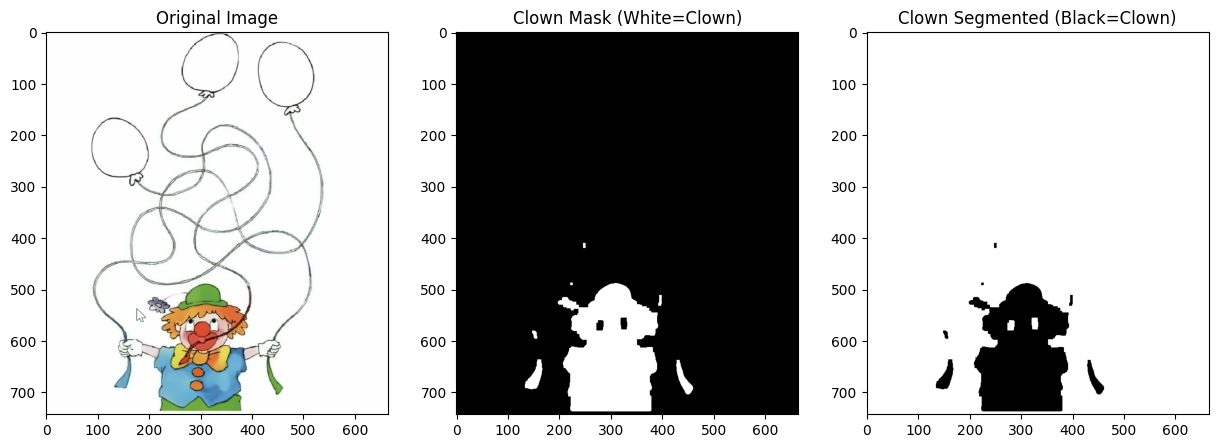

: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_clown_black(img_path):
    """
    分割小丑区域并使其呈现大片黑色
    输入：原始彩色图像路径
    输出：小丑为黑色、其他区域为白色的二值图像，及分割结果可视化图
    """
    # 1. 读取图像
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("图像路径错误，无法读取图像")
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 2. 定义颜色范围（HSV）
    # 红色
    lower_red1, upper_red1 = np.array([0, 50, 40]), np.array([10, 255, 255])
    lower_red2, upper_red2 = np.array([170, 50, 40]), np.array([180, 255, 255])
    # 橙色
    lower_orange, upper_orange = np.array([11, 50, 40]), np.array([25, 255, 255])
    # 黄色
    lower_yellow, upper_yellow = np.array([26, 50, 40]), np.array([35, 255, 255])
    # 绿色
    lower_green, upper_green = np.array([36, 50, 40]), np.array([85, 255, 255])
    # 蓝色
    lower_blue, upper_blue = np.array([86, 50, 40]), np.array([125, 255, 255])
    # 紫色
    lower_purple, upper_purple = np.array([126, 50, 40]), np.array([160, 255, 255])
    # 灰白色（低饱和度 S < 40）
    lower_gray, upper_gray = np.array([0, 0, 50]), np.array([180, 200, 200])   # 灰色
    lower_white, upper_white = np.array([0, 20, 200]), np.array([180, 50, 255]) # 白色

    # 3. 生成掩码
    mask_red   = cv2.inRange(img_hsv, lower_red1, upper_red1) | cv2.inRange(img_hsv, lower_red2, upper_red2)
    mask_orange = cv2.inRange(img_hsv, lower_orange, upper_orange)
    mask_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    mask_green  = cv2.inRange(img_hsv, lower_green, upper_green)
    mask_blue   = cv2.inRange(img_hsv, lower_blue, upper_blue)
    mask_purple = cv2.inRange(img_hsv, lower_purple, upper_purple)
    mask_gray   = cv2.inRange(img_hsv, lower_gray, upper_gray)
    mask_white  = cv2.inRange(img_hsv, lower_white, upper_white)

    # 合并掩码
    clown_mask = (mask_red | mask_orange | mask_yellow |
                  mask_green | mask_blue | mask_purple |
                  mask_gray | mask_white)

    # 4. 形态学优化
    kernel = np.ones((5, 5), np.uint8)
    clown_mask = cv2.morphologyEx(clown_mask, cv2.MORPH_OPEN, kernel, iterations=1)
    clown_mask = cv2.morphologyEx(clown_mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    # 5. 反转：小丑区域→黑色，其他区域→白色
    clown_black_img = cv2.bitwise_not(clown_mask)

    # 6. 可视化
    plt.figure(figsize=(15, 5))
    plt.subplot(131), plt.imshow(img_rgb), plt.title("Original Image")
    plt.subplot(132), plt.imshow(clown_mask, cmap="gray"), plt.title("Clown Mask (White=Clown)")
    plt.subplot(133), plt.imshow(clown_black_img, cmap="gray"), plt.title("Clown Segmented (Black=Clown)")
    plt.savefig("clown_segmentation_summary.jpg")
    plt.show()

    # ==== 用掩码处理原图 ====
    # 方法1：小丑涂黑
    result_black = cv2.bitwise_and(img, img, mask=clown_black_img)

    # 方法2：小丑去掉 → 白底
    white_bg = np.ones_like(img) * 255
    result_white = np.where(clown_black_img[..., None] == 255, img, white_bg)

    # 方法3：单独抠出小丑
    clown_only = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(clown_black_img))
    return clown_black_img, result_black, result_white, clown_only

# 调用函数
mask, rescued, white_bg, clown_only = segment_clown_black("../assets/test.png")
# 背景全设为白色
cv2.imshow("Result", white_bg)
